EMPLOYEE ATTRITION ANALYSIS

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Attrition_Data.csv')

In [3]:
df=data.copy()
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
pd.set_option('display.max_rows',50)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
#Now we handle the missing values or outlier
#here because we do not have a lot of missing values so we remove all the rows with Nan values

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [9]:
#No more missing values to handle.

In [10]:
df.nunique()

EmployeeID                 4300
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [11]:
#So, here EmployeeCount, Over18 and StandardHours have only one value so we can drop these columns

In [12]:
print(df['EmployeeCount'].value_counts())
print(df['Over18'].value_counts())
print(df['StandardHours'].value_counts())

1    4300
Name: EmployeeCount, dtype: int64
Y    4300
Name: Over18, dtype: int64
8    4300
Name: StandardHours, dtype: int64


In [13]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeID'],axis=1,inplace=True)

In [14]:
df.shape

(4300, 25)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [16]:
df['Attrition'].value_counts()

No     3605
Yes     695
Name: Attrition, dtype: int64

    COUNTPLOT FOR ATTRITION

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Human Resources'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Laboratory Technician'),
  Text(6, 0, 'Manufacturing Director'),
  Text(7, 0, 'Sales Representative'),
  Text(8, 0, 'Manager')])

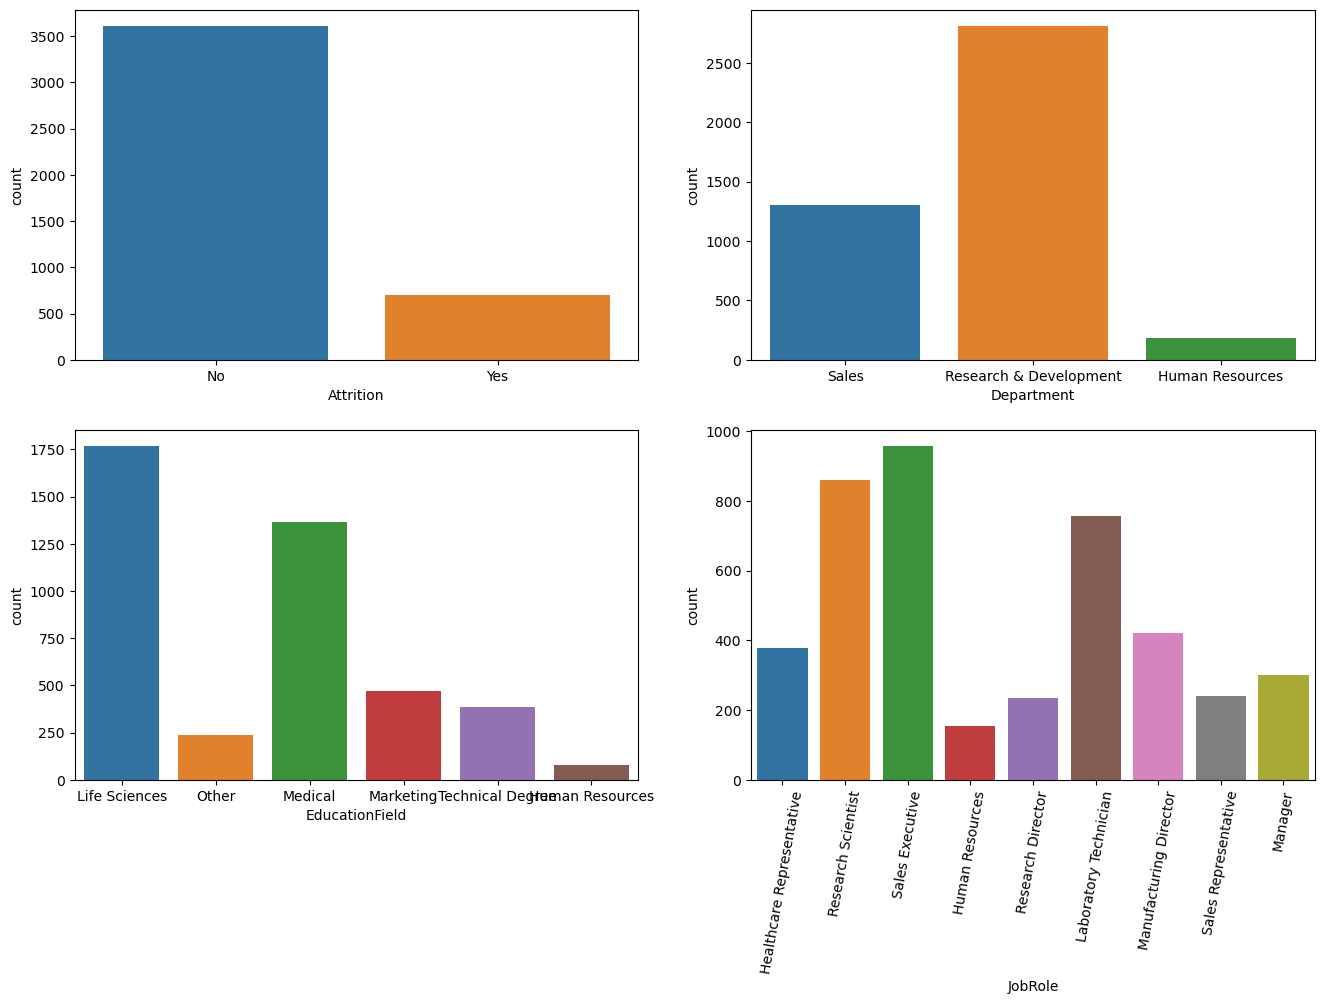

In [15]:
plt.subplots(2,2,figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x='Attrition', data =df)

plt.subplot(2,2,2)
sns.countplot(x='Department', data=df)

plt.subplot(2,2,3)
sns.countplot(x='EducationField', data=df)

plt.subplot(2,2,4)
sns.countplot(x='JobRole', data=df)
plt.xticks(rotation=80)

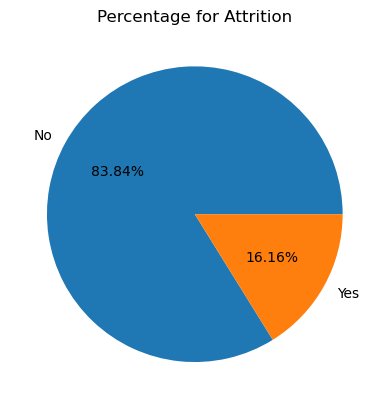

In [16]:
plt.pie(df["Attrition"].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage for Attrition')
plt.show()

Observation: 16% of employees in the organization have left the job

Department Wise Attrition

Text(0.5, 1.0, 'Department wise Attrition')

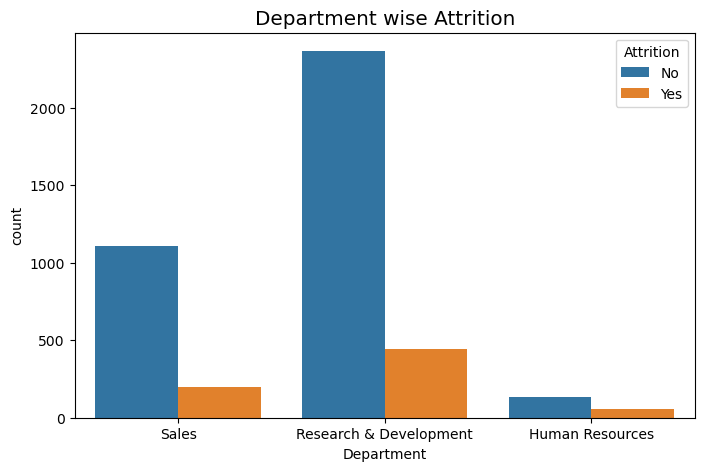

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition',data=df)
plt.title('Department wise Attrition',fontdict={'fontsize':'x-large'})


Text(0.5, 1.0, 'Percentage of Attrition in HR Dept')

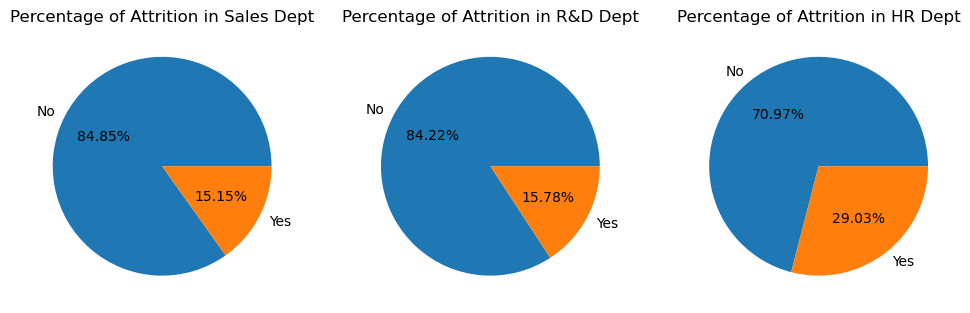

In [28]:
#Here we can see visually but cannot say with confidence what the percentage is
#for this we plot our pie plot.

plt.subplots(1,3,figsize=(12,4))

plt.subplot(1,3,1)
sales=df[df['Department']=='Sales']
plt.pie(sales['Attrition'].value_counts(),labels=sales['Attrition'].value_counts().index,autopct='%0.2f%%')
plt.title('Percentage of Attrition in Sales Dept')

plt.subplot(1,3,2)
RnD=df[df['Department']=='Research & Development']
plt.pie(RnD['Attrition'].value_counts(),labels=RnD['Attrition'].value_counts().index,autopct='%0.2f%%')
plt.title('Percentage of Attrition in R&D Dept')

plt.subplot(1,3,3)
HR=df[df['Department']=='Human Resources']
plt.pie(HR['Attrition'].value_counts(),labels=HR['Attrition'].value_counts().index,autopct='%0.2f%%')
plt.title('Percentage of Attrition in HR Dept')


Observation: Number of people leavin the job is maximum in HR Department, then RnD and in the end it is lest in Sales with 15.15%.

In [29]:
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


ATTRITION WRT JOB SATISFACTION LEVEL

([<matplotlib.patches.Wedge at 0x288ca3575b0>,
 [Text(0.6176268799741363, 0.9102400986187182, '4.0'),
  Text(-1.0670221654974903, 0.2673269502632438, '3.0'),
  Text(-0.2727803679360833, -1.0656410609903577, '1.0'),
  Text(0.9070695573007483, -0.6222739093182555, '2.0')],
 [Text(0.3368873890768016, 0.4964945992465735, '31.02%'),
  Text(-0.5820120902713583, 0.14581470014358752, '30.14%'),
  Text(-0.14878929160149995, -0.5812587605401951, '19.70%'),
  Text(0.4947652130731354, -0.3394221323554121, '19.14%')])

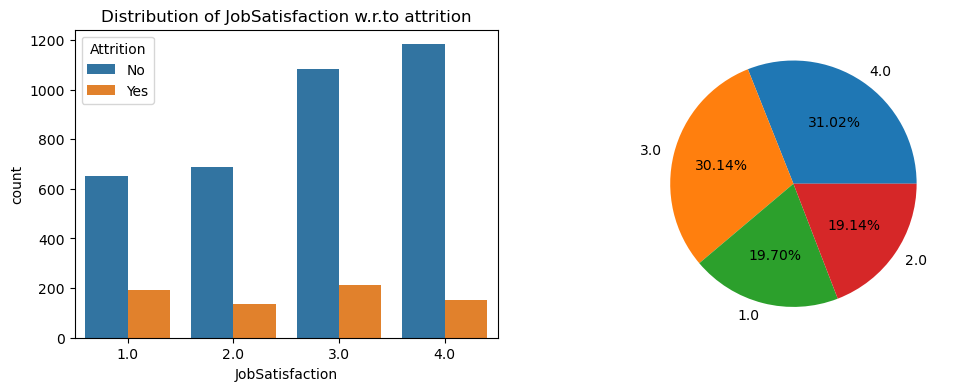

In [30]:
#plt.figure(figsize=(5,5))
plt.subplots(1,2,figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.title("Distribution of JobSatisfaction w.r.to attrition")

plt.subplot(1,2,2)
plt.pie(df['JobSatisfaction'].value_counts(),labels=df['JobSatisfaction'].value_counts().index,autopct='%0.2f%%',data=df)
#here if we wish to add the hue=attrition part in Jobsatisfaction, it could be done in various JS level=1,2,3,4 separately like we are doing below for BusinessTRavel

So it shows that with increase in job satifaction level the percentage for number of employees leaving the job is reducing from level 1 and 2 and level 3 and 4.

In [31]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


Travel frequency wise attrition:

Text(0.5, 1.0, 'Percentage of Travel for No Attrition')

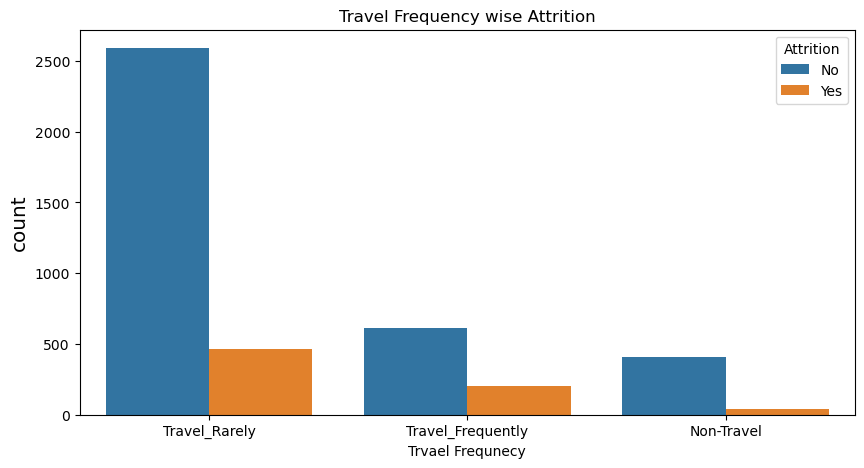

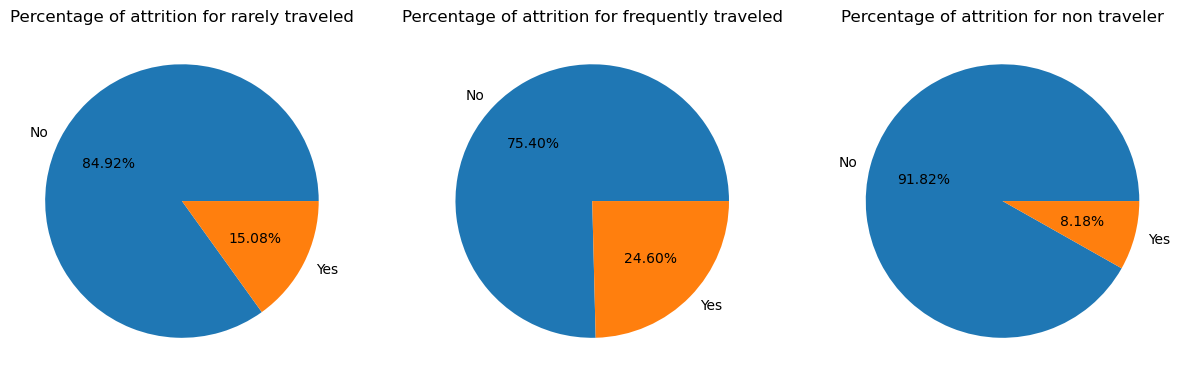

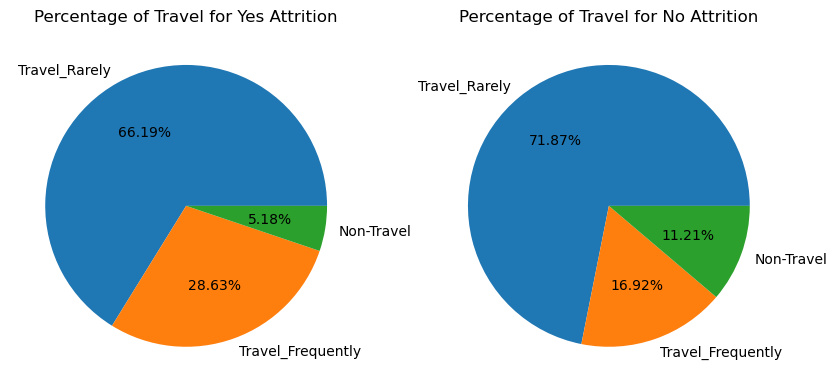

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')
plt.title("Travel Frequency wise Attrition")
plt.xlabel('Trvael Frequnecy')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
Rarely_travel=df[df['BusinessTravel']=='Travel_Rarely']
plt.pie(Rarely_travel['Attrition'].value_counts(),labels=Rarely_travel['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for rarely traveled')

plt.subplot(1,3,2)
Frequent_travel=df[df['BusinessTravel']=='Travel_Frequently']
plt.pie(Frequent_travel['Attrition'].value_counts(),labels=Frequent_travel['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for frequently traveled')

plt.subplot(1,3,3)
Non_travel=df[df['BusinessTravel']=='Non-Travel']
plt.pie(Non_travel['Attrition'].value_counts(),labels=Non_travel['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for non traveler')

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
Attr_Yes=df[df['Attrition']=='Yes']
plt.pie(Attr_Yes['BusinessTravel'].value_counts(),labels=Attr_Yes['BusinessTravel'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for Yes Attrition')

plt.subplot(1,2,2)
Attr_No=df[df['Attrition']=='No']
plt.pie(Attr_No['BusinessTravel'].value_counts(),labels=Attr_No['BusinessTravel'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for No Attrition')

So here we can say people who travel frequently have left the job more maybe because they got more opporutnities by travelling and meeting new people. Same way the non travellers are the least percentage to have left the job. 

same way the 2nd set of pieplot shows amongst the people who left the job around 66% were rare travellers.

In [34]:
df['PerformanceRating'].value_counts()

3    3638
4     662
Name: PerformanceRating, dtype: int64

Text(0, 0.5, 'count')

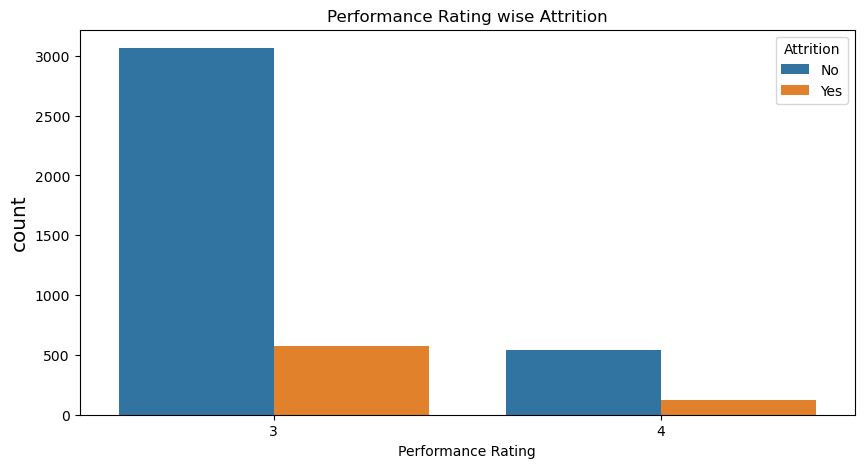

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')
plt.title("Performance Rating wise Attrition")
plt.xlabel('Performance Rating')
plt.ylabel('count',fontdict={'fontsize':'x-large'})


Text(0, 0.5, 'count')

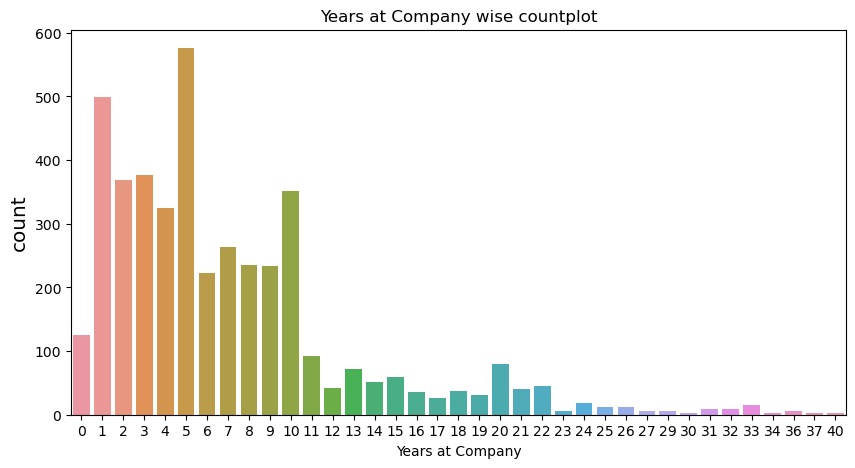

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsAtCompany',data=df)
plt.title("Years at Company wise countplot")
plt.xlabel('Years at Company')
plt.ylabel('count',fontdict={'fontsize':'x-large'})


From this plot we can say that initially as the company is new there is an on and off increase/decrease in number of employees. But, after year 10 there is a significant decrese in count of employees meaning after 10 years the count of employees who retain in the company decreases gradually. 

EFFECT OF DISTANCE FROM HOME

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Plot for Distance from home of Employees')

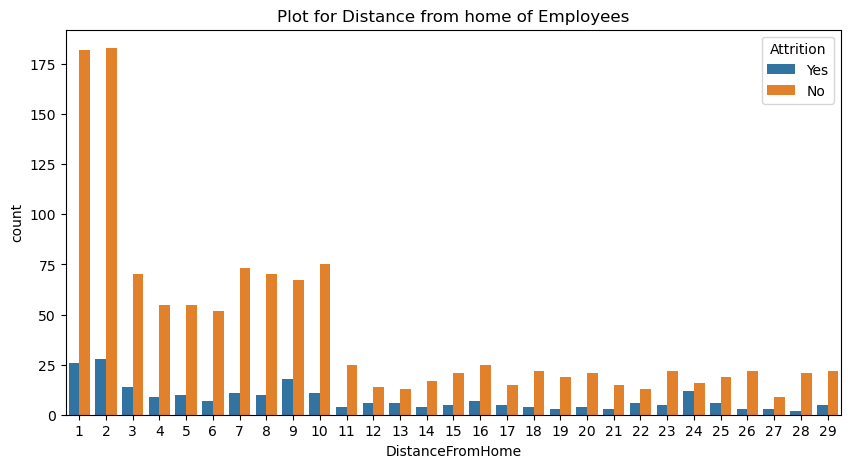

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='DistanceFromHome',data=df,hue='Attrition')
plt.title('Plot for Distance from home of Employees')

There is no certain trend between 'DistanceFromHome' and 'Attrition. But one thing that we can say for sure from above plot is that in the initial plot area where 'DistanceFromHome' is less the count of employee is more and later as 'DistanceFromHome' increases the count of employee has somewhat increased.

In [43]:
#dis=1 yes=15.2 no=84.8
#dis=5 yes=16.13 no=83.87
#dis=9 yes=13.15 no=86.85
#dis=10 yes=23.44 no=76.66
#dis=11 yes=9.3 no=90.7
#dis=13 yes=5.36 no=94.64
#dis=15 yes=58.44 no=41.56
#dis=18 yes=19.48 no=80.52
#dis=20 yes=12.33 no=87.67
#dis=22 yes=16.36 no=83.64
#dis=25 yes=8.22 no=84.8
#dis=26 yes=4.05 no=95.95
#dis=27 yes=25 no=75
#dis=28 yes=16.67 no=83.33
#dis=29 yes=15 no=85


Text(0.5, 1.0, 'Percentage of attrition when Distance from Home is 10')

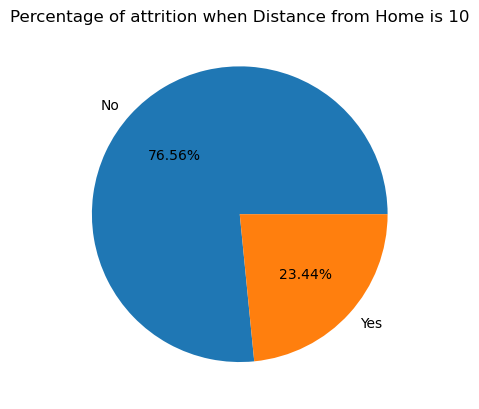

In [17]:
#plt.subplot(1,2,1)
Frequent_travel=df[df['DistanceFromHome']==10]
plt.pie(Frequent_travel['Attrition'].value_counts(),labels=Frequent_travel['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition when Distance from Home is 10')

In [18]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


    EDUCATION FIELD WISE ATTRITION

Text(0.5, 1.0, 'Percentage of Travel for No Attrition')

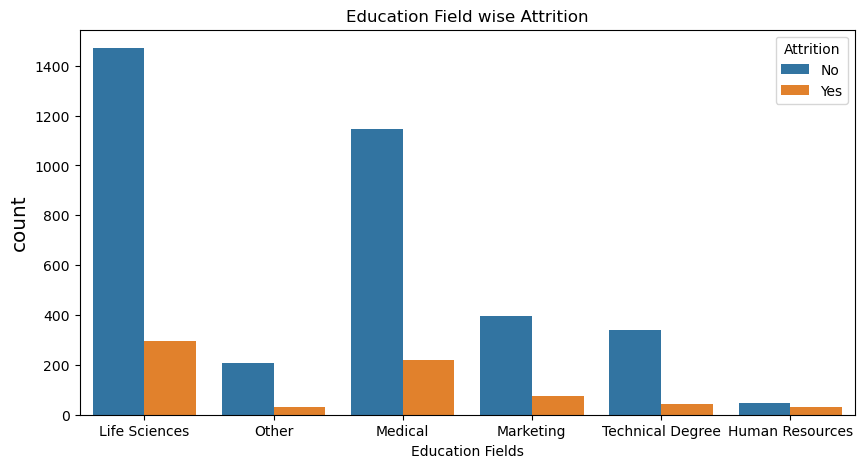

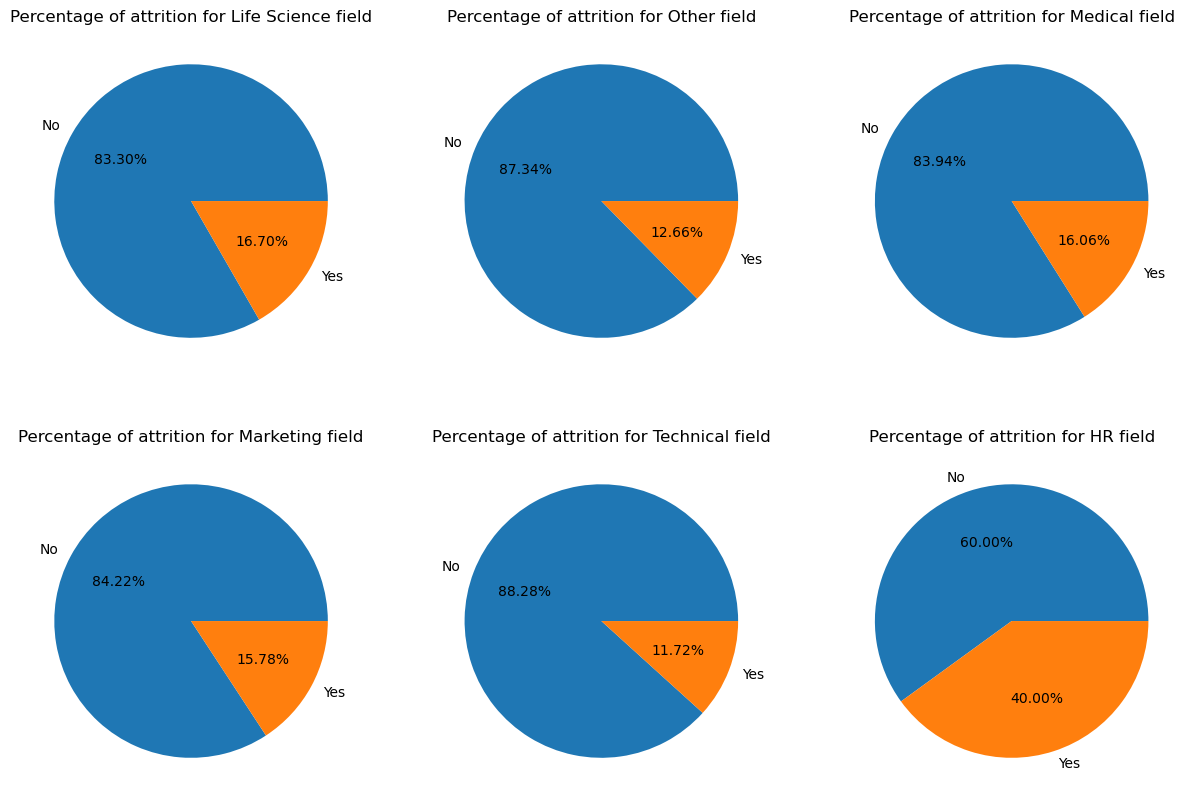

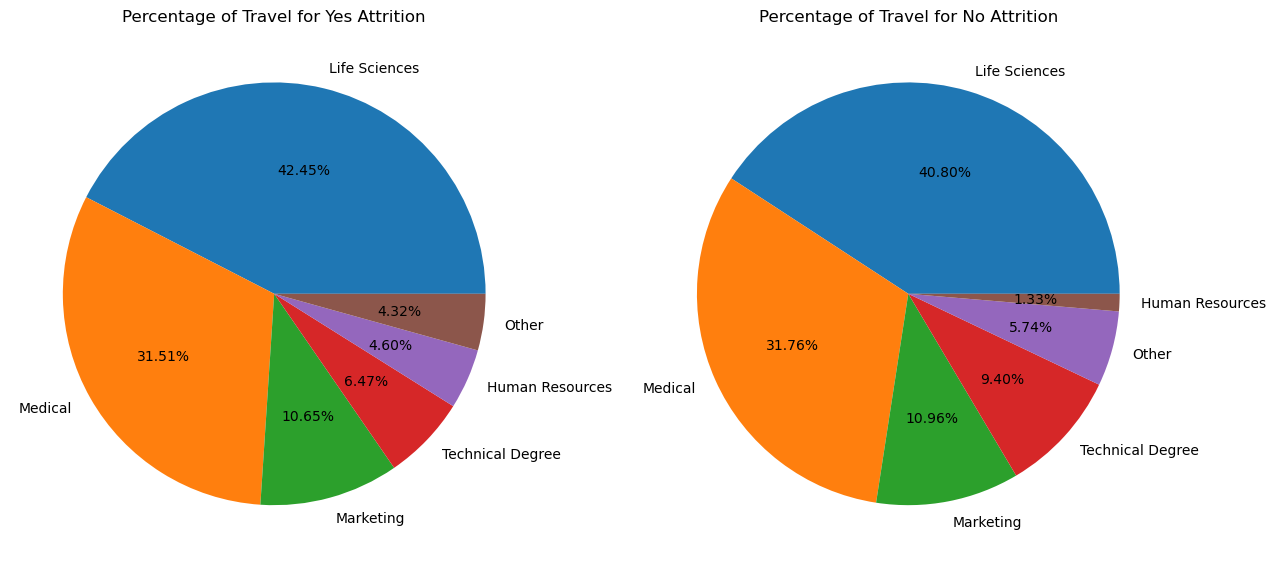

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',data=df,hue='Attrition')
plt.title("Education Field wise Attrition")
plt.xlabel('Education Fields')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

plt.subplots(2,3,figsize=(15,10))

plt.subplot(2,3,1)
Life_sc=df[df['EducationField']=='Life Sciences']
plt.pie(Life_sc['Attrition'].value_counts(),labels=Life_sc['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Life Science field')

plt.subplot(2,3,2)
other=df[df['EducationField']=='Other']
plt.pie(other['Attrition'].value_counts(),labels=other['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Other field')

plt.subplot(2,3,3)
Med=df[df['EducationField']=='Medical']
plt.pie(Med['Attrition'].value_counts(),labels=Med['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Medical field')


plt.subplot(2,3,4)
Marketing=df[df['EducationField']=='Marketing']
plt.pie(Marketing['Attrition'].value_counts(),labels=Marketing['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Marketing field')


plt.subplot(2,3,5)
Tech=df[df['EducationField']=='Technical Degree']
plt.pie(Tech['Attrition'].value_counts(),labels=Tech['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Technical field')


plt.subplot(2,3,6)
HR=df[df['EducationField']=='Human Resources']
plt.pie(HR['Attrition'].value_counts(),labels=HR['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for HR field')


plt.subplots(1,2,figsize=(15,10))

plt.subplot(1,2,1)
Attr_Yes=df[df['Attrition']=='Yes']
plt.pie(Attr_Yes['EducationField'].value_counts(),labels=Attr_Yes['EducationField'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for Yes Attrition')

plt.subplot(1,2,2)
Attr_No=df[df['Attrition']=='No']
plt.pie(Attr_No['EducationField'].value_counts(),labels=Attr_No['EducationField'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for No Attrition')

From the given countplot we can figure out that people leaving the job in LIfe Science and Medical field is more as compared to others. Max percentage is from Marketting and HR. 
But just by this graph we cannot say anything certain. So, we will plot pie plot for fix percentage.
From the pieplot we can say for sure  that maximum attrition is in HR field with 40% and the least is technical with 11.72%.
From 2nd set of pieplot we can say that maximum percentage for YES and No in Attrition field is covered by Medical and Life Science field, this we can see from the countplot as well.

    ENVIRONMENT SATISFACTION WISE ATTRITION

Text(0.5, 1.0, 'Percentage of Travel for No Attrition')

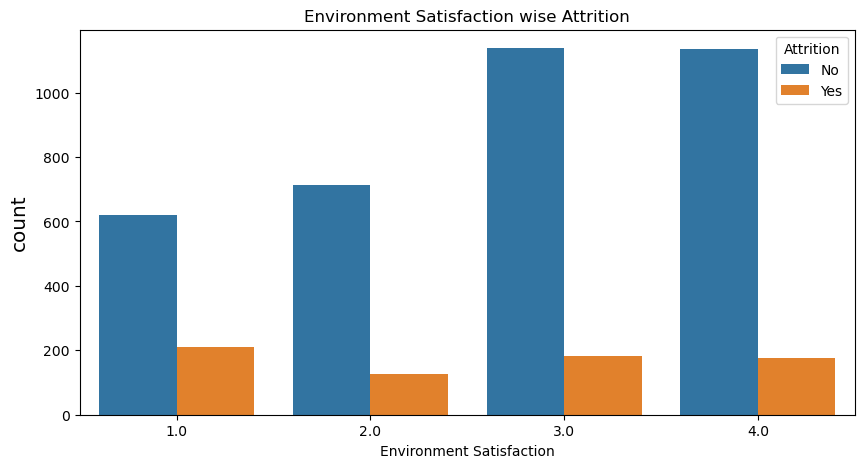

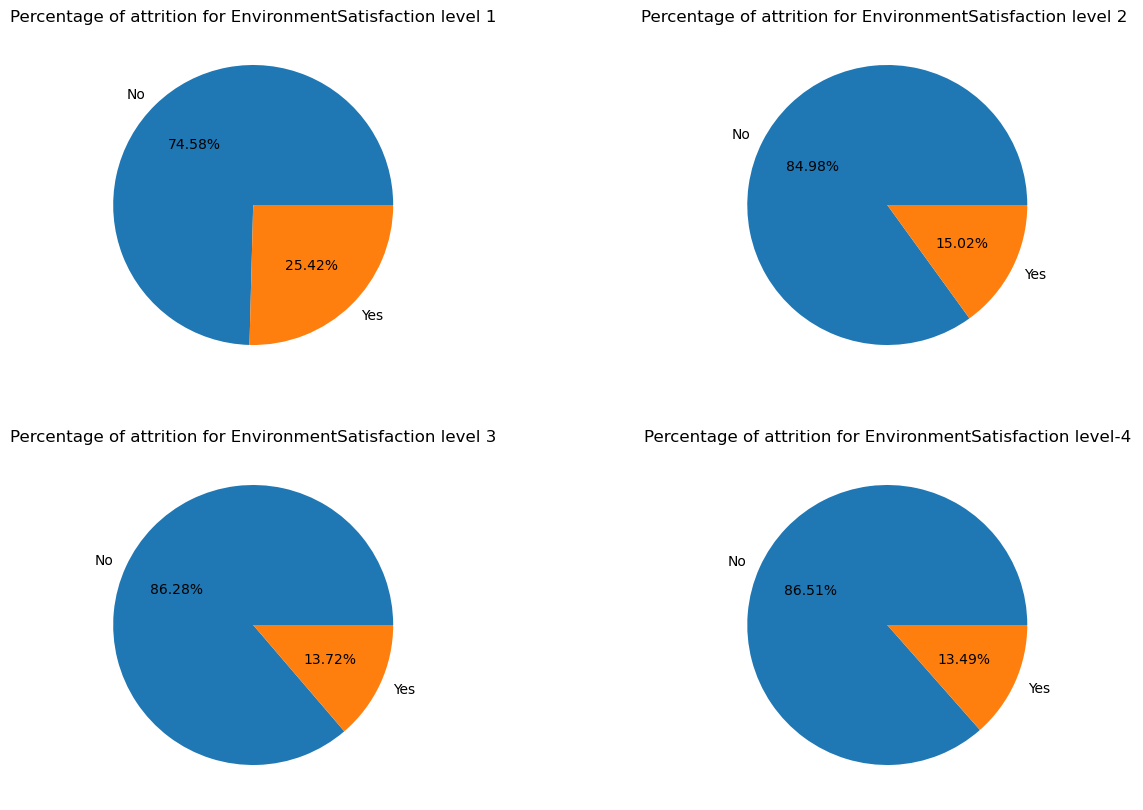

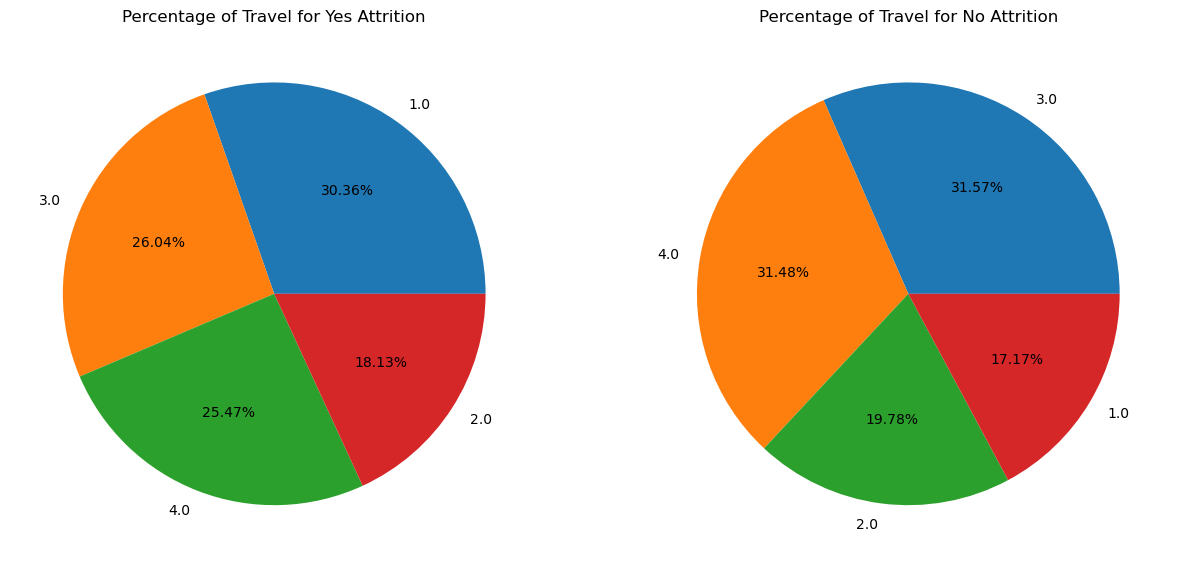

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')
plt.title("Environment Satisfaction wise Attrition")
plt.xlabel('Environment Satisfaction')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

plt.subplots(2,2,figsize=(15,10))

plt.subplot(2,2,1)
EnvSat_1=df[df['EnvironmentSatisfaction']==1]
plt.pie(EnvSat_1['Attrition'].value_counts(),labels=EnvSat_1['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for EnvironmentSatisfaction level 1')

plt.subplot(2,2,2)
EnvSat_2=df[df['EnvironmentSatisfaction']==2]
plt.pie(EnvSat_2['Attrition'].value_counts(),labels=EnvSat_2['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for EnvironmentSatisfaction level 2 ')

plt.subplot(2,2,3)
EnvSat_3=df[df['EnvironmentSatisfaction']==3]
plt.pie(EnvSat_3['Attrition'].value_counts(),labels=EnvSat_3['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for EnvironmentSatisfaction level 3')


plt.subplot(2,2,4)
EnvSat_4=df[df['EnvironmentSatisfaction']==4]
plt.pie(EnvSat_4['Attrition'].value_counts(),labels=EnvSat_4['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for EnvironmentSatisfaction level-4')



plt.subplots(1,2,figsize=(15,10))

plt.subplot(1,2,1)
Attr_Yes=df[df['Attrition']=='Yes']
plt.pie(Attr_Yes['EnvironmentSatisfaction'].value_counts(),labels=Attr_Yes['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for Yes Attrition')

plt.subplot(1,2,2)
Attr_No=df[df['Attrition']=='No']
plt.pie(Attr_No['EnvironmentSatisfaction'].value_counts(),labels=Attr_No['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of Travel for No Attrition')

In [ ]:
From the countplot we can say that as the level of EnvironmentSatisfaction increases the percentage of attrition has reduced.
Fix value we will be able to depict from the pieplot.
From the pieplot we can say that attrition is least in level 4 and level 3 with 13.45% and 13.69%
From 2nd set of pieplot we can say that maximum % of Yes attrition is in level 1 with 30.38%.

    GENDER WISE ATTRITION

Text(0.5, 1.0, 'Percentage of attrition for Female Gender ')

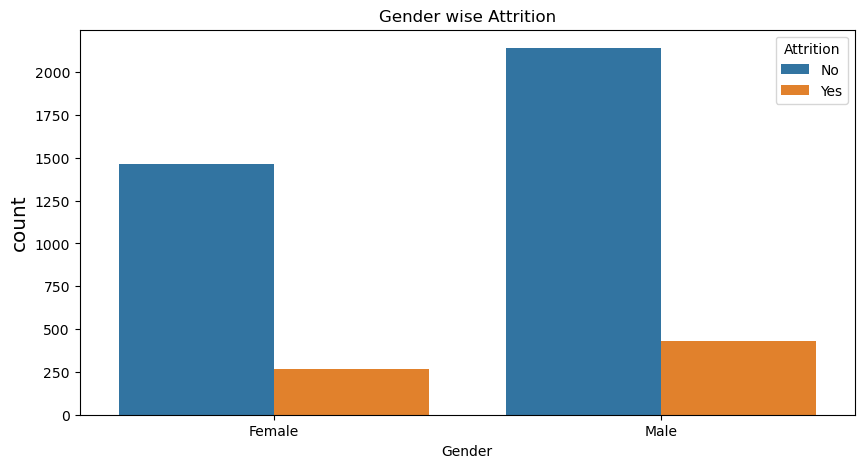

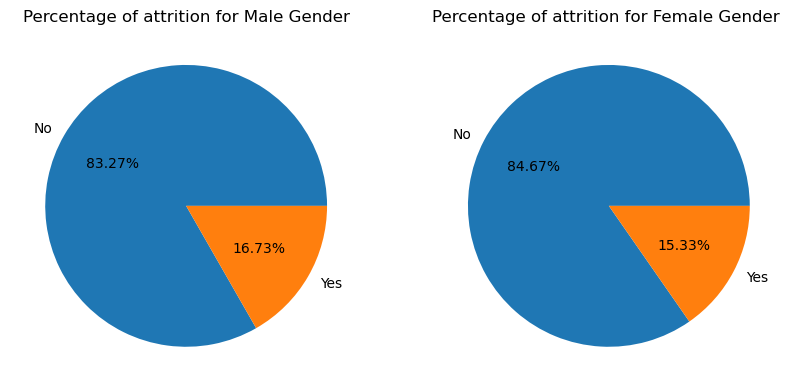

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.title("Gender wise Attrition")
plt.xlabel('Gender')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
Male=df[df['Gender']=='Male']
plt.pie(Male['Attrition'].value_counts(),labels=Male['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Male Gender')

plt.subplot(1,2,2)
Female=df[df['Gender']=='Female']
plt.pie(Female['Attrition'].value_counts(),labels=Female['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of attrition for Female Gender ')




# plt.subplots(1,2,figsize=(15,10))

# plt.subplot(1,2,1)
# Attr_Yes=df[df['Attrition']=='Yes']
# plt.pie(Attr_Yes['EnvironmentSatisfaction'].value_counts(),labels=Attr_Yes['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of Travel for Yes Attrition')

# plt.subplot(1,2,2)
# Attr_No=df[df['Attrition']=='No']
# plt.pie(Attr_No['EnvironmentSatisfaction'].value_counts(),labels=Attr_No['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of Travel for No Attrition')

Here we cannot say much from just the countplot but only that attrition in both male and female is less than 25%.
from the pieplot we come to know about the actaual percentage which is about 16.73% in male and 15.33% in female. So Attrition is almost same in gender only a point increase in male so male percentage of leaving the company is slightly more.

    PERFORMANCE RATING WISE ATTRITION

Text(0.5, 1.0, "Percentage of attrition for '4' Gender")

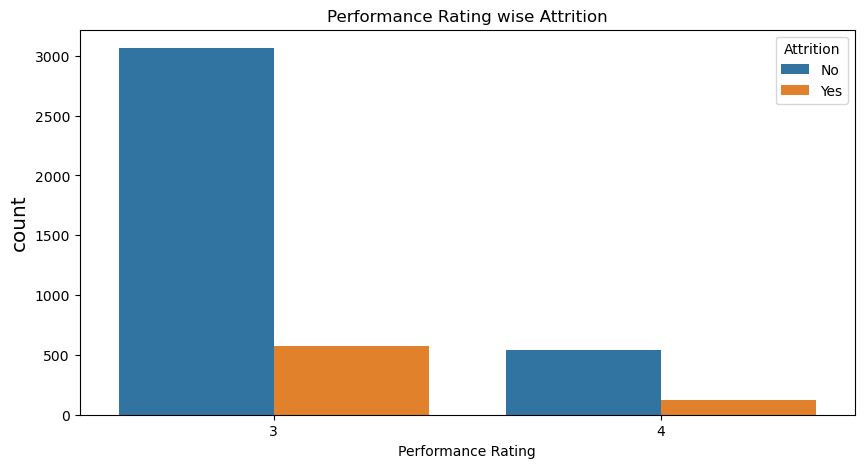

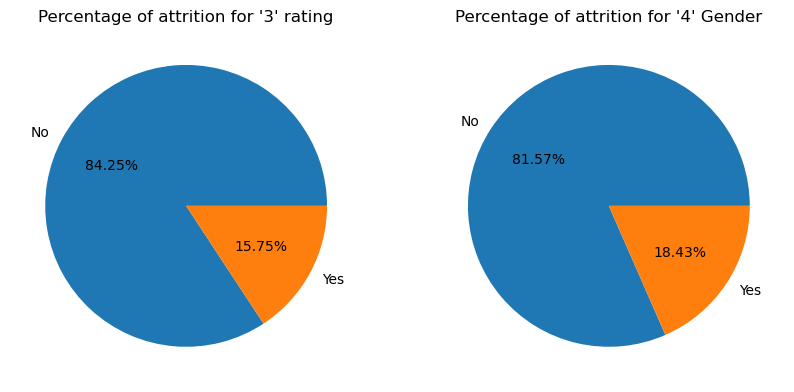

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')
plt.title("Performance Rating wise Attrition")
plt.xlabel('Performance Rating')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
Perf_3=df[df['PerformanceRating']==3]
plt.pie(Perf_3['Attrition'].value_counts(),labels=Perf_3['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title("Percentage of attrition for '3' rating")

plt.subplot(1,2,2)
Perf_4=df[df['PerformanceRating']==4]
plt.pie(Perf_4['Attrition'].value_counts(),labels=Perf_4['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title("Percentage of attrition for '4' rating")

In [ ]:
BY seeing the count plot the attrition in both PerformanceRating 3 and 4 seems about 20%.
From pieplot we can see it is about 15.75% for employees with '3' rating and 18.43% for employees with '4' as 
PerformanceRating.
So employee getting better rating are tend to leave the company more maybe with the mind set of getting a better 
oppotunity somewhere else.

In [69]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


    TOTAL WORKING YEARS WISE ATTRITION

Text(0, 0.5, 'count')

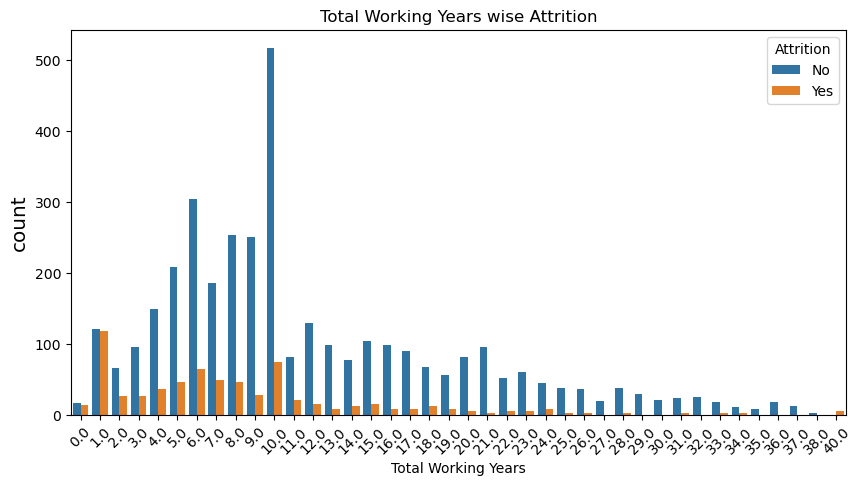

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='TotalWorkingYears',data=df,hue='Attrition')
plt.title("Total Working Years wise Attrition")
plt.xlabel('Total Working Years')
plt.xticks(rotation=45)
plt.ylabel('count',fontdict={'fontsize':'x-large'})

# plt.subplots(1,2,figsize=(10,5))

# plt.subplot(1,2,1)
# Perf_3=df[df['PerformanceRating']==3]
# plt.pie(Perf_3['Attrition'].value_counts(),labels=Perf_3['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of attrition for Male Gender')

# plt.subplot(1,2,2)
# Perf_4=df[df['PerformanceRating']==4]
# plt.pie(Perf_4['Attrition'].value_counts(),labels=Perf_4['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of attrition for Female Gender ')

In [ ]:
From the count plot we can see that till 10 years of working the number of employees is increasing and is max at 10.
Also, as the number of working years are icreasing after 11 onwards the count of employees is decreasing.
We cannot say anything about the % of attrition without plotting the pie plot for each 'TotalWorkingYear'.

       YEARS SINCE LAST PROMOTION WISE ATTRITION

Text(0, 0.5, 'count')

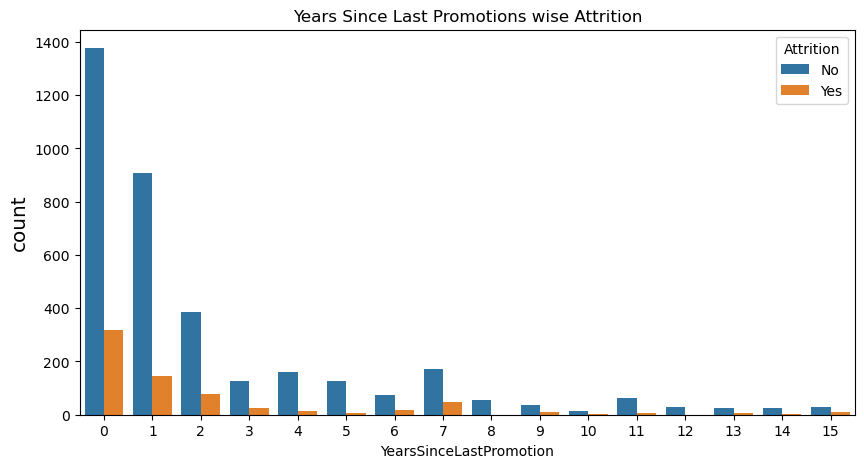

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsSinceLastPromotion',data=df,hue='Attrition')
plt.title("Years Since Last Promotions wise Attrition")
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('count',fontdict={'fontsize':'x-large'})

# plt.subplots(1,2,figsize=(10,5))

# plt.subplot(1,2,1)
# Perf_3=df[df['PerformanceRating']==3]
# plt.pie(Perf_3['Attrition'].value_counts(),labels=Perf_3['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of attrition for Male Gender')

# plt.subplot(1,2,2)
# Perf_4=df[df['PerformanceRating']==4]
# plt.pie(Perf_4['Attrition'].value_counts(),labels=Perf_4['Attrition'].value_counts().index,autopct='%0.2f%%',data=df)
# plt.title('Percentage of attrition for Female Gender ')

 From the count plot we can say the employees with recent promotion(0,1,2) are more as compared to employees with more years since last promotion.
 The percentage of employee leaving the job since recent years in promotion is about 25% approx.

TRAINING TIME LAST YEARVERSUS ATTRITION, YEARS WITH CURRENT MANAGER WISE ATTRITION, WORK LIFE BALANCE VERSUS ATTRITION, YEARS AT COMPANY WISE ATTRITION, YEARS IN CURRENT ROLE WISE ATTRITION
In the same way as above we can plot the countplot and pieplot for all other columns as well wrt to hue=attrition.

In [25]:
pd.set_option('display.max_columns',50)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


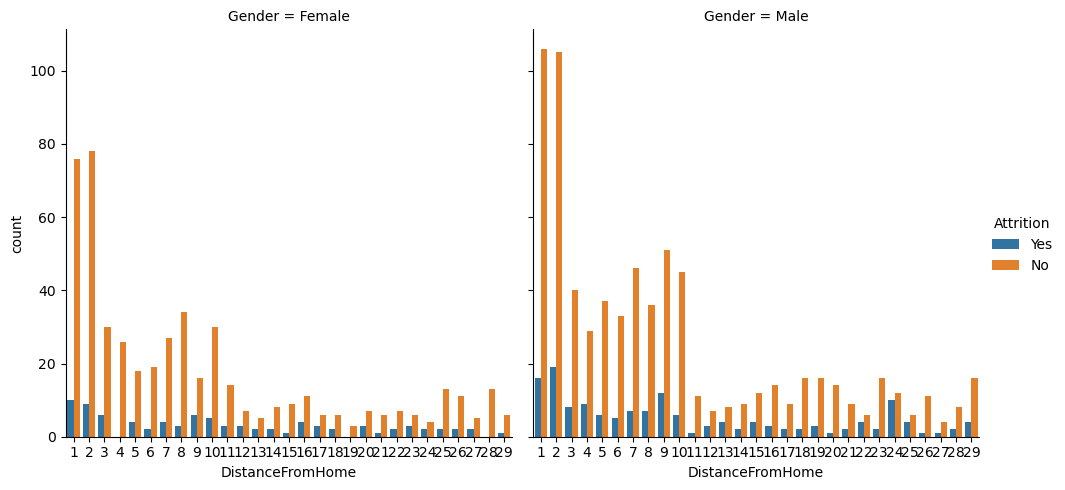

In [26]:
sns.catplot(x="DistanceFromHome",kind="count",data=df,hue="Attrition",col="Gender")

 For both male and female the count decreases as the distance from home increases.
 

<Axes: xlabel='DistanceFromHome', ylabel='Gender'>

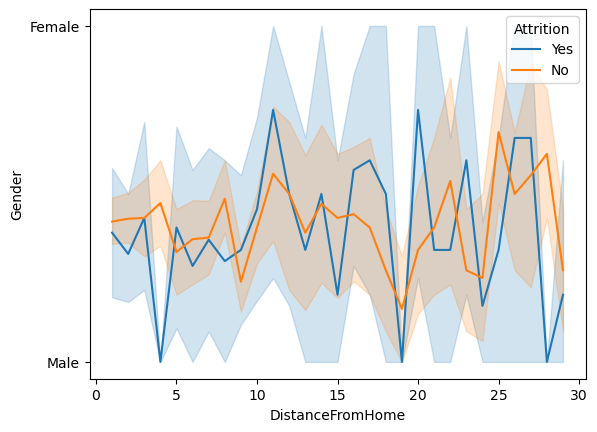

In [28]:
sns.lineplot(x="DistanceFromHome",y='Gender',hue="Attrition",data=df)

<Axes: xlabel='DistanceFromHome', ylabel='Gender'>

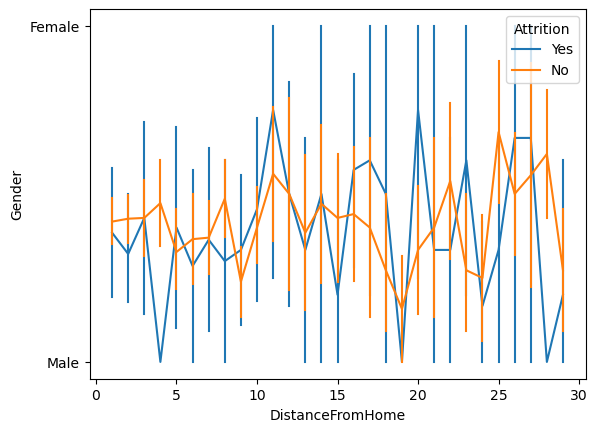

In [29]:
sns.lineplot(x="DistanceFromHome",y='Gender',hue="Attrition",data=df,err_style='bars')

<Axes: xlabel='PercentSalaryHike', ylabel='Gender'>

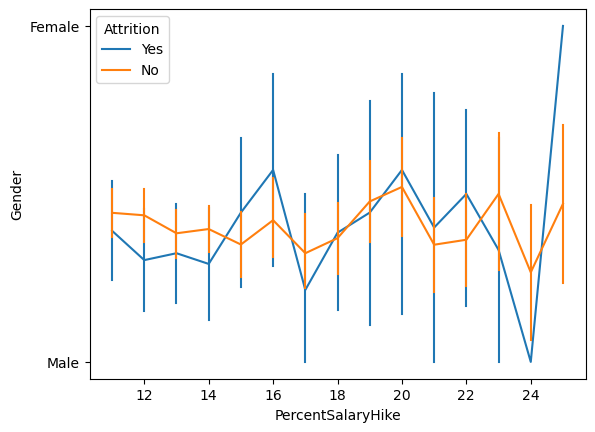

In [30]:
sns.lineplot(x="PercentSalaryHike",y='Gender',hue="Attrition",data=df,err_style='bars')

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

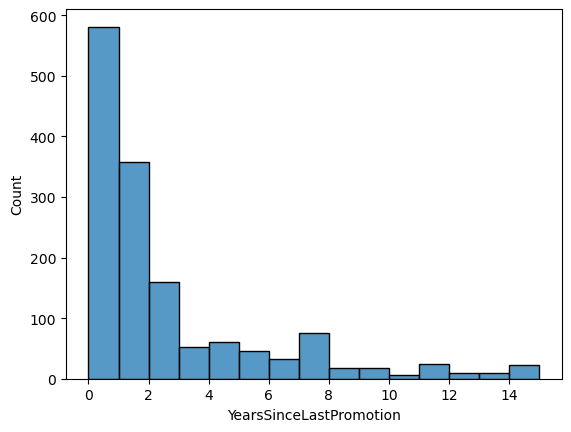

In [34]:
sns.histplot(data=df,x="YearsSinceLastPromotion",bins=15)

As the Years since last promotion is increasing the count of employees is decreasing.

<Axes: ylabel='DistanceFromHome'>

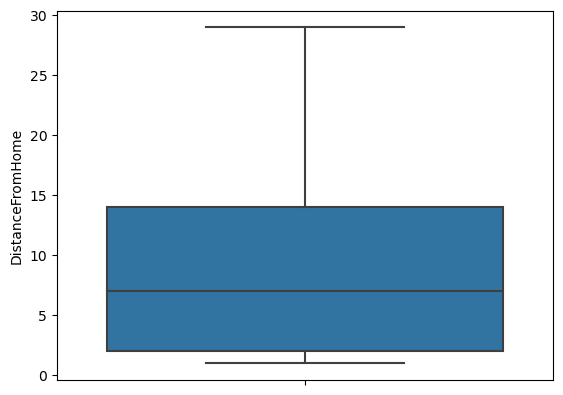

In [39]:
sns.boxplot(y=df['DistanceFromHome'])

    COLUMNS WITH CONTINUOUS VARIABLES

In [22]:

pd.set_option('display.max_columns',50)
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [25]:
df_cont=df[['Age','DistanceFromHome','JobLevel','MonthlyIncome','JobSatisfaction','PerformanceRating','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']]

<Axes: >

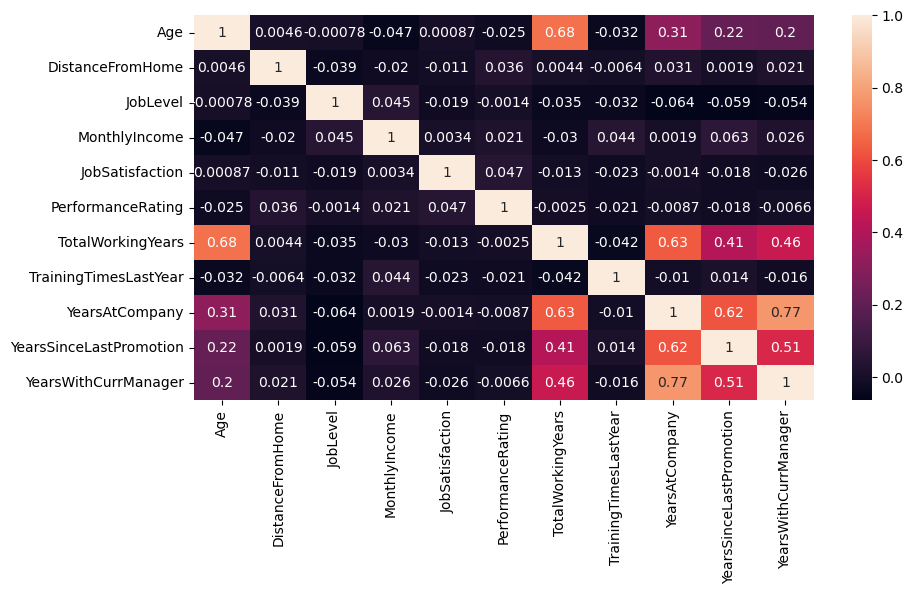

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cont.corr(),annot=True)   #corelation matrix

Heatmap helps quickly identify pairs of features that are highly correlated, indicating potential multicollinearity in the
data. 
The heatmap visually represents the correlation matrix. The color intensity represents the magnitude of correlation:
Darker red indicates strong positive correlation (close to 1).
Darker blue/ black indicates strong negative correlation (close to -1).
White or light colors indicate weak or no correlation.
If two features have a high correlation (e.g., Feature1 and Feature2), they might be multicollinear.
If there is high multicollinearity, we can consider removing one of the correlated variables to reduce dmensionality as both the columns 
are representing the same thing.

In [54]:
df_cont_1=df[['Age','DistanceFromHome','MonthlyIncome','MonthlyRate','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion']]

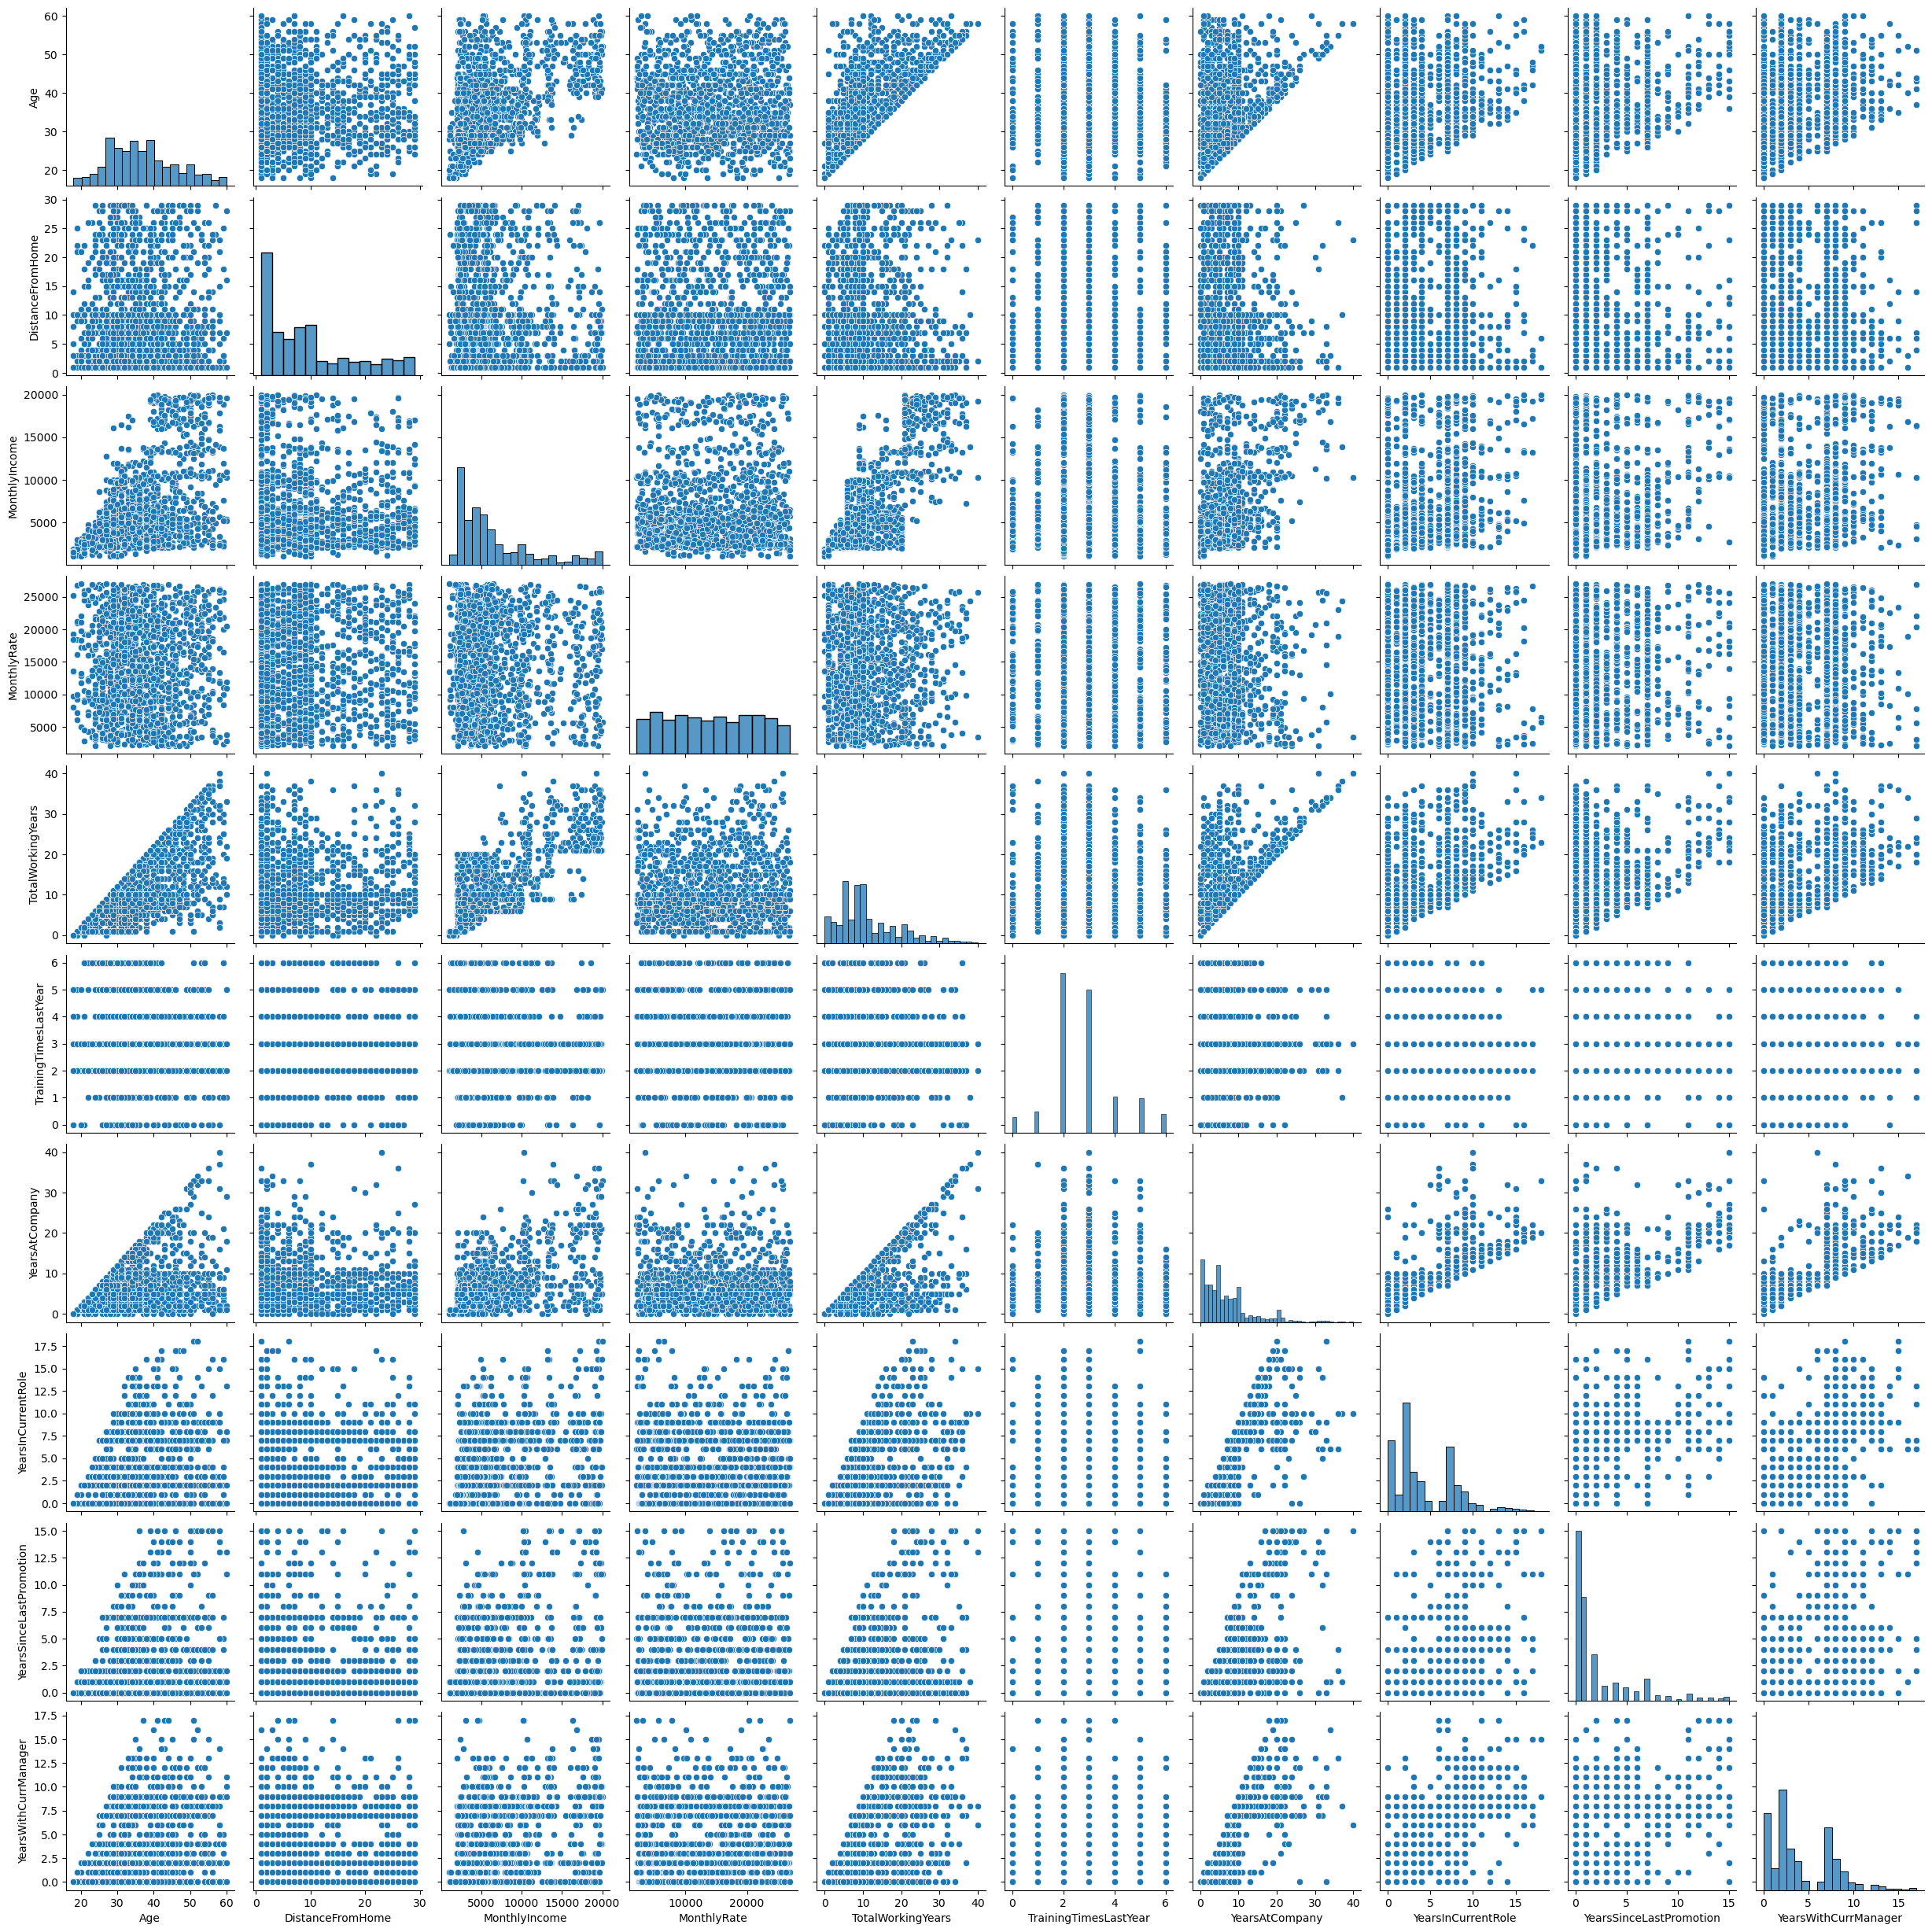

In [55]:
sns.pairplot(df_cont_1)

In [ ]:
   Scatter Plots (Off-Diagonal Elements):

* Linear Relationships: If the points in a scatter plot are aligned along a straight line, it indicates a linear relationship between the variables.
    - Positive Linear Relationship: If the line has an upward slope, as one variable increases, the other increases as well.
    - Negative Linear Relationship: If the line has a downward slope, as one variable increases, the other decreases.
    - Non-Linear Relationships: If the points form a curve or any non-linear pattern, it suggests a non-linear relationship between the variables.
    - No Relationship: If the points are scattered without any discernible pattern, it indicates little or no correlation between the variables.

    Distribution Plots (Diagonal Elements):

* Histograms: By default, pairplot shows histograms on the diagonal. These reveal the distribution of each variable:
    - Normal Distribution: A bell-shaped histogram indicates a normal distribution.
    - Skewness: A histogram skewed to the left or right shows that the data is not symmetrically distributed.
    - KDE Plots: If diag_kind='kde' is used, kernel density estimates (KDE) are displayed instead of histograms, which smooth out the histogram to show the underlying distribution more clearly.

# Building a model for dataset

In [17]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Outlier Handling

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DistanceFromHome'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'JobLevel'),
  Text(4, 0, 'MonthlyIncome'),
  Text(5, 0, 'NumCompaniesWorked'),
  Text(6, 0, 'PercentSalaryHike'),
  Text(7, 0, 'StockOptionLevel'),
  Text(8, 0, 'TotalWorkingYears'),
  Text(9, 0, 'TrainingTimesLastYear'),
  Text(10, 0, 'YearsAtCompany'),
  Text(11, 0, 'YearsSinceLastPromotion'),
  Text(12, 0, 'YearsWithCurrManager'),
  Text(13, 0, 'EnvironmentSatisfaction'),
  Text(14, 0, 'JobSatisfaction'),
  Text(15, 0, 'WorkLifeBalance'),
  Text(16, 0, 'JobInvolvement'),
  Text(17, 0, 'PerformanceRating')])

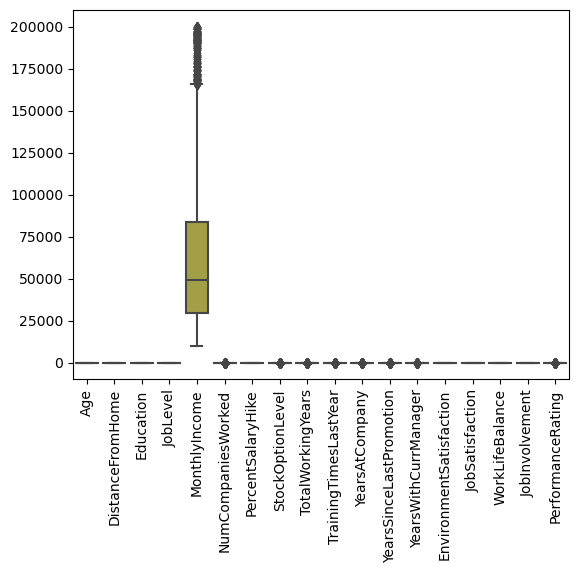

In [18]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

There seems no major outlier in our dataset except for the MonthlyIncome column, but the salary value is bound to be this high as compared
to other data which is why we can say there is no outlier in the data. The difference between values will be handled during 
scaling of data.

In [20]:
#Label Encoding
from sklearn import preprocessing

In [21]:
label=preprocessing.LabelEncoder()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   object 
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel        

In [23]:

df['MaritalStatus']=label.fit_transform(df['MaritalStatus'])
df['JobRole']=label.fit_transform(df['JobRole'])
df['EducationField']=label.fit_transform(df['EducationField'])
df['Gender']=label.fit_transform(df['Gender'])
df['BusinessTravel']=label.fit_transform(df['BusinessTravel'])
df['Department']=label.fit_transform(df['Department'])
df['DistanceFromHome']=label.fit_transform(df['DistanceFromHome'])


# model building process

In [24]:
#split independent and dependent variable
X=df.drop('Attrition',axis=1)   #X is our independent variable
Y=df['Attrition']   #Y is out target variable

In [25]:
X.shape

(4300, 24)

In [26]:
Y.shape

(4300,)

In [88]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,2,2,5,2,1,0,1,0,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,9,1,1,0,1,6,2,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,1,1,16,4,4,1,4,7,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,1,1,5,1,1,3,1,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,2,1,9,1,3,1,1,7,2,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [89]:
df.kurt()

Age                       -0.406791
BusinessTravel             0.695063
Department                -0.394699
DistanceFromHome          -0.221293
Education                 -0.564084
EducationField            -0.683260
Gender                    -1.841258
JobLevel                   0.380953
JobRole                   -1.189881
MaritalStatus             -1.112072
MonthlyIncome              1.000247
NumCompaniesWorked         0.024837
PercentSalaryHike         -0.306703
StockOptionLevel           0.346281
TotalWorkingYears          0.914704
TrainingTimesLastYear      0.495029
YearsAtCompany             3.934102
YearsSinceLastPromotion    3.623498
YearsWithCurrManager       0.167900
EnvironmentSatisfaction   -1.204189
JobSatisfaction           -1.222980
WorkLifeBalance            0.409796
JobInvolvement             0.260589
PerformanceRating          1.680785
dtype: float64

In [90]:
df.skew()

Age                        0.415565
BusinessTravel            -1.437532
Department                 0.166653
DistanceFromHome           0.956264
Education                 -0.291790
EducationField             0.547725
Gender                    -0.399498
JobLevel                   1.018456
JobRole                   -0.360557
MaritalStatus             -0.157338
MonthlyIncome              1.367877
NumCompaniesWorked         1.033271
PercentSalaryHike          0.820078
StockOptionLevel           0.965477
TotalWorkingYears          1.115775
TrainingTimesLastYear      0.547454
YearsAtCompany             1.769615
YearsSinceLastPromotion    1.989623
YearsWithCurrManager       0.833091
EnvironmentSatisfaction   -0.323154
JobSatisfaction           -0.324865
WorkLifeBalance           -0.552117
JobInvolvement            -0.492247
PerformanceRating          1.918334
dtype: float64

In [91]:
#skewness and kurtosis show that data is normally distributed hence, we can use StandardScaler
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()       #as data is normally distributed
X_scaled=scaler.fit_transform(X)

In [93]:
X_scaled

array([[ 1.53879994,  0.59004105,  1.39903498, ..., -1.07551815,
         0.38155047, -0.42657721],
       [-0.64807905, -0.91213569, -0.49333696, ...,  1.75046904,
        -1.02553959,  2.34424151],
       [-0.5387351 , -0.91213569, -0.49333696, ..., -2.48851174,
         0.38155047, -0.42657721],
       ...,
       [-0.86676694,  0.59004105, -0.49333696, ...,  0.33747545,
        -1.02553959, -0.42657721],
       [-1.30414274,  0.59004105, -0.49333696, ...,  0.33747545,
         0.38155047,  2.34424151],
       [ 0.5547044 ,  0.59004105,  1.39903498, ...,  0.33747545,
        -1.02553959, -0.42657721]])

In [94]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [95]:
X_scaled

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.538800,0.590041,1.399035,-0.394993,-0.891282,-0.938886,-1.219421,-0.964277,-1.818003,-0.138065,...,-1.320442,2.483520,-0.980272,-0.677926,-1.159067,0.252403,1.157359,-1.075518,0.38155,-0.426577
1,-0.648079,-0.912136,-0.493337,0.099071,-1.867220,-0.938886,-1.219421,-0.964277,0.624684,1.233017,...,-0.678523,0.157924,-0.329582,-0.368371,-0.037179,0.252403,-0.657940,1.750469,-1.02554,2.344242
2,-0.538735,-0.912136,-0.493337,0.963683,1.060595,1.319062,0.820062,1.746964,1.031799,-0.138065,...,-0.806907,-0.617274,-0.329582,-0.677926,-0.317651,-0.661946,-0.657940,-2.488512,0.38155,-0.426577
3,0.117329,-2.414312,-0.493337,-0.889057,2.036534,-0.938886,0.820062,0.843217,-1.410888,-0.138065,...,0.220163,1.708321,0.158435,1.488960,0.243293,1.166752,1.157359,0.337475,-1.02554,-0.426577
4,-0.538735,0.590041,-0.493337,0.099071,-1.867220,0.566412,0.820062,-0.964277,1.031799,1.233017,...,-0.293372,-0.617274,-0.166910,-0.677926,-0.037179,1.166752,-1.565590,0.337475,0.38155,-0.426577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,-0.866767,0.590041,1.399035,-0.642025,0.084657,1.319062,-1.219421,-0.060530,-1.410888,1.233017,...,-0.678523,-0.617274,-0.166910,-0.368371,0.243293,0.252403,1.157359,0.337475,-1.02554,-0.426577
4296,0.554704,0.590041,-0.493337,-0.518509,1.060595,0.566412,-1.219421,-0.964277,0.624684,1.233017,...,-0.164988,1.708321,-0.654927,-0.677926,-0.598123,1.166752,-1.565590,0.337475,0.38155,-0.426577
4297,-0.866767,0.590041,-0.493337,-0.889057,1.060595,0.566412,0.820062,-0.964277,-1.003774,-1.509147,...,-0.164988,-0.617274,-0.654927,-0.677926,-0.598123,1.166752,1.157359,0.337475,-1.02554,-0.426577
4298,-1.304143,0.590041,-0.493337,1.951811,-0.891282,-0.938886,0.820062,-0.060530,1.031799,-0.138065,...,-0.806907,0.933123,-0.492255,-0.368371,-0.598123,-1.576295,0.249709,0.337475,0.38155,2.344242


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=20,train_size=0.75,stratify=Y)  #75% training data

In [98]:
X_train.shape

(3225, 24)

In [99]:
Y.value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

In [100]:
from sklearn.linear_model import LogisticRegression 

In [101]:
log_reg=LogisticRegression()

In [102]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [104]:
Y_train_predict=log_reg.predict(X_train)

In [105]:
accuracy_score(Y_train,Y_train_predict) 

0.8486821705426356

In [106]:
confusion_matrix(Y_train,Y_train_predict)  #300+359 are right prediction and 74+35 are wrong predictions

array([[2667,   37],
       [ 451,   70]], dtype=int64)

In [107]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2704
           1       0.65      0.13      0.22       521

    accuracy                           0.85      3225
   macro avg       0.75      0.56      0.57      3225
weighted avg       0.82      0.85      0.80      3225



The overall accuracy (85%) may seem high, but it is primarily due to the model's strong performance on the majority class. 
The low recall and F1-score for the minority class ("Yes") suggest that the model is not effectively capturing this class, 
which could be critical depending on the context.

# SVM approach

In [108]:
from sklearn.svm import SVR,SVC

In [109]:
svc_model=SVC(C=1.0,kernel='rbf',gamma=0.01)
svc_model.fit(X_train,Y_train)
predict_svc_train=svc_model.predict(X_train)
predict_svc_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
accuracy_score(Y_train,predict_svc_train)

0.8384496124031008

In [111]:
confusion_matrix(Y_train,predict_svc_train)

array([[2704,    0],
       [ 521,    0]], dtype=int64)

In [112]:
print(classification_report(Y_train,predict_svc_train))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2704
           1       0.00      0.00      0.00       521

    accuracy                           0.84      3225
   macro avg       0.42      0.50      0.46      3225
weighted avg       0.70      0.84      0.76      3225



In [113]:
predict_svc_test=svc_model.predict(X_test)

In [114]:
accuracy_score(Y_test,predict_svc_test)

0.838139534883721

In [115]:
print(classification_report(Y_test,predict_svc_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       901
           1       0.00      0.00      0.00       174

    accuracy                           0.84      1075
   macro avg       0.42      0.50      0.46      1075
weighted avg       0.70      0.84      0.76      1075



Consistent Results: Both the training and testing data have similar accuracy (~83.8%), indicating that the model is not overfitting but is consistently underperforming on the minority class ("Yes").
Class Imbalance: The model is heavily biased towards the "No" class, with perfect recall for "No" and complete failure for "Yes". This suggests a significant class imbalance or that the model is not learning to recognize the "Yes" class effectively

# Random Forest

Random Forests are ensemble models that build multiple decision trees and aggregate their predictions. 
They are less likely to be biased towards the majority class and can handle class imbalance by adjusting class weights.


In [117]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
rf=RandomForestClassifier()
bg=BaggingClassifier()
rf_pred=rf.fit(X_train,Y_train)
y_pred_train=rf_pred.predict(X_train)
y_pred_test=rf_pred.predict(X_test)
accuracy_score(Y_train,y_pred_train)

1.0

In [118]:
accuracy_score(Y_test,y_pred_test)

0.986046511627907

In [119]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2704
           1       1.00      1.00      1.00       521

    accuracy                           1.00      3225
   macro avg       1.00      1.00      1.00      3225
weighted avg       1.00      1.00      1.00      3225



In [120]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       901
           1       1.00      0.91      0.95       174

    accuracy                           0.99      1075
   macro avg       0.99      0.96      0.97      1075
weighted avg       0.99      0.99      0.99      1075



The training data shows perfect results, which is often a red flag for overfitting. The model may not generalize well to unseen data.
The testing data results are also strong, but the slight drop in recall for the minority class ('Yes') indicates the model might be missing some instances of 'Yes'.

# Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
gd_model=GradientBoostingClassifier()
gd_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [123]:
gd_pred = gd_model.predict(X_train)
accuracy_score(Y_train,gd_pred)

0.9113178294573644

In [124]:
print(classification_report(Y_train,gd_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2704
           1       0.96      0.47      0.63       521

    accuracy                           0.91      3225
   macro avg       0.94      0.73      0.79      3225
weighted avg       0.92      0.91      0.90      3225



In [125]:
gd_pred_test=gd_model.predict(X_test)
accuracy_score(Y_test,gd_pred_test)



0.893953488372093

In [126]:
print(classification_report(Y_test,gd_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       901
           1       0.95      0.36      0.53       174

    accuracy                           0.89      1075
   macro avg       0.92      0.68      0.73      1075
weighted avg       0.90      0.89      0.87      1075



The model performs well in identifying the "No" class, with high precision and recall in both training and testing.
The "Yes" class, however, has much lower recall (47% in training, 36% in testing), suggesting that the model is missing a significant portion of "Yes" cases, even though the precision is high.
This indicates an imbalance or difficulty in detecting the "Yes" class, which could be due to class imbalance or other factors affecting the model's ability to generalize.

# Cross Validation to check for Overfitting

In [127]:
Y_train.value_counts()

0    2704
1     521
Name: Attrition, dtype: int64

In [83]:

Y.shape

(4300,)

In [84]:
Y.value_counts()

No     3605
Yes     695
Name: Attrition, dtype: int64

In [86]:
#label encoding the Y so that cross validation works proper
Y=Y.map({'No': 0, 'Yes': 1})

In [87]:
Y.value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

The model performs well in identifying the "No" class, with high precision and recall in both training and testing. The "Yes" class, however, has much lower recall (47% in training, 36% in testing), suggesting that the model is missing a significant portion of "Yes" cases, even though the precision is high. This indicates an imbalance detecting the "Yes" class, which could be due to class imbalance.

In [128]:
from sklearn.model_selection import cross_val_score, cross_validate

In [129]:
rf=RandomForestClassifier()

In [130]:
# Performing cross-validation (assuming 5-fold cross-validation)
cv_scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores_positive = -cv_scores

print("Cross-Validated MSE Scores:")
print(cv_scores_positive)

# Average MSE score
print(f"Average MSE: {cv_scores_positive.mean()}")

Cross-Validated MSE Scores:
[0.03100775 0.03100775 0.02325581 0.0372093  0.0248062 ]
Average MSE: 0.029457364341085267


In [133]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Define model
model = RandomForestClassifier()

# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Use F1-score for the minority class as the evaluation metric
f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, Y, cv=skf, scoring=f1_scorer)

print("Cross-validated F1-scores:", cv_scores)
print("Average F1-score:", cv_scores.mean())

Cross-validated F1-scores: [1.         1.         1.         1.         0.99638989]
Average F1-score: 0.9992779783393502


The model is showing very high F1-scores across cross-validation folds, indicating strong performance. However, the 
near-perfect scores, especially in an imbalanced dataset scenario, suggest potential overfitting. Careful examination 
using additional metrics and validation techniques is recommended to ensure that the model generalizes well to new, 
unseen data.

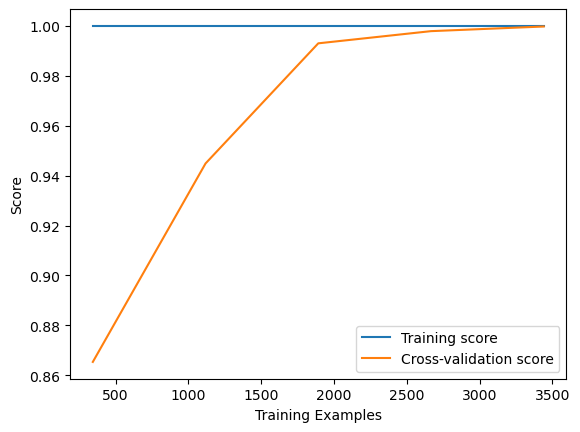

In [134]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, Y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.show()

The high training score coupled with a lower cross-validation score, particularly at the beginning, is a classic sign of overfitting. The model performs perfectly on the training data but struggles more on unseen data.
However, the fact that the cross-validation score improves as more data is added suggests that adding more training data could help mitigate the overfitting.
The cross-validation score improves and converges toward the training score as the number of training examples increases. This is a good sign that with enough data, the model might generalize well.
However, the final cross-validation score is still slightly lower than the training score, which might indicate a small amount of overfitting remains.

# Oversampling

Here we are over sampling as the amount of data is less.Also, we always sample the training data. Never balance the testing dataset-as if you test these datasets you will have always good results-but when client
checks the model on some real world data which is mostly imbalanced it will not give that good results as you have 
claimed So we shoukd only balance the training dataset and train the model well and then test the model with imbalanced
testing dataset

In [135]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [136]:
over=RandomOverSampler()

In [137]:
X_train.shape

(3225, 24)

In [139]:
Y_train.value_counts()

0    2704
1     521
Name: Attrition, dtype: int64

In [140]:
# oversampling approach
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)    #here we use resample instead of transform

In [142]:
X_train_over.shape

(5408, 24)

In [143]:
Y_train_over.value_counts()

0    2704
1    2704
Name: Attrition, dtype: int64

In [144]:
rf.fit(X_train_over,Y_train_over) 
Y_pred_over_RF=rf.predict(X_test) 
print(classification_report(Y_test,Y_pred_over_RF)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       901
           1       1.00      0.93      0.96       174

    accuracy                           0.99      1075
   macro avg       0.99      0.97      0.98      1075
weighted avg       0.99      0.99      0.99      1075



In [ ]:
Results for Random forest model after oversampling

Balanced Performance: After oversampling, your model performs well on both classes. The recall for class 1 (the minority class before oversampling) is slightly lower at 0.93, but the precision is perfect at 1.00. This means that while the model occasionally misses a class 1 instance, it is highly confident and accurate when it does predict class 1.

High F1-Scores: The high F1-scores for both classes suggest that the model is handling the classification task well, with a good balance between precision and recall.

Generalization: The results indicate that the model is likely generalizing well across both classes, thanks in part to the oversampling process which balanced the class distribution.